# Lab 3: Titanic Survival Prediction

**Author:** Justin Schroder

**Date:** 3/24/2025

**Objective:** 

The objective of this project is to compare two data splitting methods, train/test split and stratified shuffle split, using the Titanic dataset. The goal is to evaluate how each method affects class distribution and model performance.

## Introduction

This project focuses on preparing and analyzing the Titanic dataset for machine learning by performing data preprocessing and evaluating different methods of splitting the data into training and test sets. The goal is to assess the impact of data split techniques, such as the basic train/test split and stratified shuffle split, on class distribution and model performance. By comparing these methods, the project highlights the importance of ensuring balanced data representation, which is crucial for building more reliable and accurate machine learning models.

---


## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.  

### 1.1 Imports

In [65]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd

### 1.2 Load the dataset

In [66]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

--- 

## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data
* Fill missing values in age using the median.
* Fill missing values in embark_town using the mode.

In [67]:
# Handle missing values without inplace modification
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering
* Create family_size (sum of siblings/spouses and parents/children).
* Convert categorical sex to numeric (0: male, 1: female).
* Convert embarked to numeric (C: 0, Q: 1, S: 2).
* Convert alone to binary (0 or 1).

In [68]:
# Feature engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

--- 

## Section 3: Feature Selection and Justification
* Case 1:
  * Input features: alone
  * Target: survived

* Case 2:
  * Input features: age 
  * Target: survived

* Case 3:
  * Input features: age and family_size 
  * Target: survived

In [69]:
# Case 1: alone only
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only (or your choice)
X = titanic[['age']]
y = titanic['survived']

# Case 3: age + family_size (or your choice)
X = titanic[['age', 'family_size']]
y = titanic['survived']


### Reflection 3:
* Why are these features selected?
  * Alone might be predictive because passengers who traveled alone may have a different survival rate compared to those with family members.
  * Age could be relevant since children and elderly passengers might have had higher survival rates.
  * Family size could also affect survival, as larger family groups might have different survival chances compared to smaller groups or individuals.
* Are there features that are likely to be highly predictive of survival?
  * Variables such as age, sex, class, and family size are generally predictive, as these have been shown to impact survival rates. Sex, for instance, might be especially predictive, as women and children were often prioritized for lifeboats.

--- 

## Section 4: Train a Classification Model (Decision Tree)
### 4.1 Split the Data

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Split the data
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Output train and test set sizes
print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179



### 4.2 Create and Train Model (Decision Tree)

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

In [72]:
from sklearn.metrics import classification_report

# Predict on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [73]:
# Predict on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Heatmap Report Confusion Matrix 

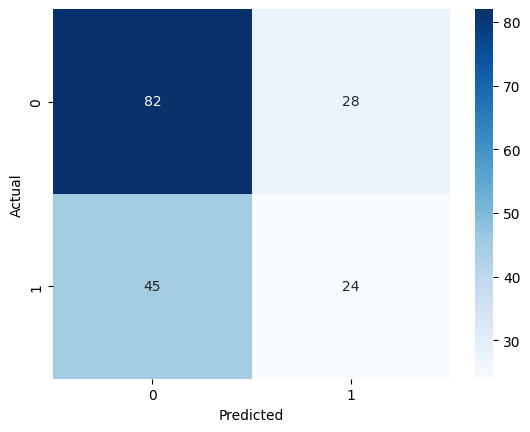

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

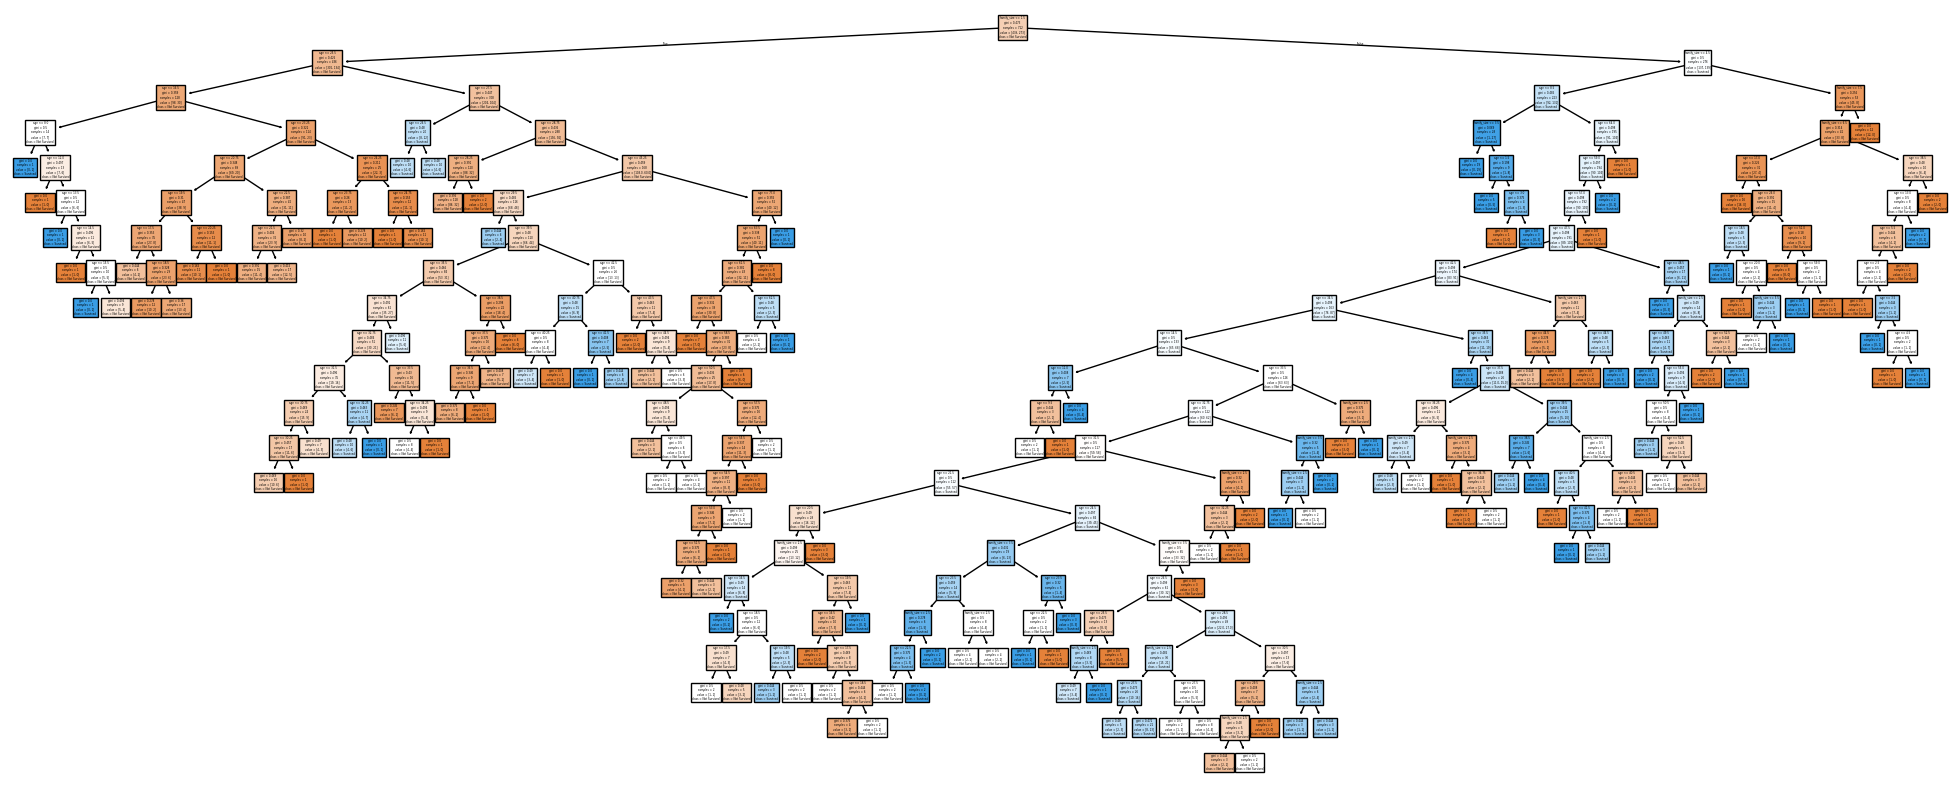

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
fig = plt.figure(figsize=(25, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Save the image
fig.savefig("decision_tree_titanic.png")

### Reflection 4:


In [76]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Display the sizes of the train and test sets
print('Train size:', len(X_train))
print('Test size:', len(X_test))


Train size: 712
Test size: 179


### 4.2 Stratified Train/Test split

In [77]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### 4.3 Comparing Class Distributions

In [78]:
print("Original Class Distribution (survived):\n", y.value_counts(normalize=True))
print("Train Set Class Distribution (survived):\n", y_train.value_counts(normalize=True))
print("Test Set Class Distribution (survived):\n", y_test.value_counts(normalize=True))

Original Class Distribution (survived):
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution (survived):
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
Test Set Class Distribution (survived):
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64


### Section 4 Reflection:

1. Why might stratification improve model performance?

    Stratification improves model performance by ensuring that both the training and test sets have the same class distribution as the original dataset. This helps prevent biases, especially for imbalanced classes, ensuring the model is exposed to the correct proportions of each class. It leads to better generalization and more reliable performance since the model is trained and evaluated on data that mirrors the actual distribution.

2. How close are the training and test distributions to the original dataset?
   
   The distributions of the training and test sets are very close to the original dataset. In the original dataset, the class distribution was 61.6% non-survived (0) and 38.4% survived (1). In the training set, the distribution was 61.1% non-survived and 38.9% survived, which is very close to the original. In the test set, the distribution was 63.7% non-survived and 36.3% survived. While the test set slightly overrepresents the non-survived class, the proportions in both sets are still close to the original dataset.

3. Which split method produced better class balance?
   
   The StratifiedShuffleSplit method produced better class balance compared to train_test_split. Stratified splitting ensured the class distributions in both the training and test sets were closer to the original dataset. While both methods produced reasonably balanced splits, StratifiedShuffleSplit maintained a more accurate class proportion, especially in the test set, where the basic split showed slight deviations.

---

## Conclusion: 

In conclusion, the process of splitting the Titanic dataset into training and test sets using both basic train/test split and stratified shuffle split revealed the importance of ensuring representative class distributions. Stratified sampling provided a more balanced split in terms of class distribution, which is crucial for improving model performance by ensuring that both classes are well-represented in both the training and test sets. While both splitting methods resulted in reasonably close distributions to the original dataset, stratification provided a more consistent class distribution across splits. This emphasizes the value of stratification in preparing data for more reliable and accurate machine learning models.

---